# **7️⃣ L1 vs. L2 Regularisation: Detailed Explanation, Math, and Code Examples 📏💪🔥**

## **💡 Real-Life Analogy: Choosing a Football Team Squad ⚽️🏆**

Imagine you're a football coach selecting a squad for a major tournament:
- **L1 Regularisation (Lasso)** is like choosing a **lean, star-studded team** where you pick only the most influential players and drop the rest. 🏅
- **L2 Regularisation (Ridge)** is like having a **deep squad** where you keep all players but slightly reduce the impact of those who might not be as crucial, ensuring that everyone contributes modestly. 🤝

Both approaches aim to build a **balanced team** (or model) that performs well without over-relying on any single player (feature), preventing **overfitting** and enhancing **generalisation**.

## **📌 What Are L1 and L2 Regularisation?**

### **L1 Regularisation (Lasso)**

✅ **Definition**: Adds a penalty equal to the **absolute value** of the weights.
✅ **Effect**: Tends to **sparsify** the model (i.e., set some coefficients exactly to zero), effectively performing **feature selection**.
✅ **Mathematical Formula**:

$$
\text{Penalty}_{L1} = \lambda \sum_{i=1}^{n} |w_i|
$$

- $ \lambda $ is the regularisation parameter (controls the strength of the penalty).
- $ w_i $ are the model weights.

### **L2 Regularisation (Ridge)**

✅ **Definition**: Adds a penalty equal to the **square of the weights**.
✅ **Effect**: Tends to **shrink all coefficients** towards zero but rarely forces any to be exactly zero.
✅ **Mathematical Formula**:

$$
\text{Penalty}_{L2} = \lambda \sum_{i=1}^{n} w_i^2
$$

## **📊 Comparison Table: L1 vs. L2 Regularisation**

| Feature                     | **L1 Regularisation (Lasso)** 🎯                             | **L2 Regularisation (Ridge)** 🚀               |
|-----------------------------|--------------------------------------------------------------|-----------------------------------------------|
| **Penalty Function**        | $\lambda \sum_{i=1}^{n} \lvert w_i\rvert$                   | $\lambda \sum_{i=1}^{n} w_i^2$                  |
| **Effect on Weights**       | Encourages **sparsity** (many zeros) 🧹                   | Shrinks weights **uniformly** 📉                |
| **Feature Selection**       | Performs **implicit feature selection** 🔍                    | Does **not** set weights exactly to zero       |
| **Sensitivity to Outliers** | More robust (if features are scaled) 💪                      | Can be sensitive to outliers ⚠️                |
| **When to Use**             | When you suspect only a **few features** are important 🏅     | When **all features** contribute, but you want to prevent overfitting 🌟 |

## **📈 Visualising the Impact**

Imagine plotting the magnitude of coefficients after training:
- **L1 Regularisation** might yield a plot where **several coefficients drop to zero** (features dropped from the model).
- **L2 Regularisation** yields a plot where **all coefficients are reduced in magnitude** but remain nonzero.

## **🛠️ Python Code Examples with Synthetic Sports Data**

Below, we create a synthetic dataset representing a sports scenario (e.g., predicting a football team’s success based on various features). We'll use **scikit-learn**'s Lasso (L1) and Ridge (L2) regressions to illustrate the differences.

### **A) Generating Synthetic Football Data**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic football data
n_samples = 200

In [ ]:
# Shots on Target: 0 to 10, Possession: 30% to 100%, Opponent Strength: 0 to 10
shots = np.random.randint(0, 11, n_samples)
possession = np.random.randint(30, 101, n_samples)
opp_strength = np.random.randint(0, 11, n_samples)

In [ ]:
# Stack features into X and create a synthetic target (scoring probability)
X = np.vstack([shots, possession, opp_strength]).T
# Target: a function of features with noise (e.g., higher shots & possession increase probability, higher opp strength decreases)
y = (0.05 * shots + 0.01 * possession - 0.04 * opp_strength + np.random.randn(n_samples)*0.05)
y = (y - y.min()) / (y.max() - y.min())  # Scale target between 0 and 1

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize features for regularisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **B) Fitting Lasso (L1) and Ridge (L2) Models**

In [15]:
# Define regularisation strength
alpha_val = 0.1

# Train Lasso (L1) model
lasso_model = Lasso(alpha=alpha_val, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
lasso_coef = lasso_model.coef_

# Train Ridge (L2) model
ridge_model = Ridge(alpha=alpha_val, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
ridge_coef = ridge_model.coef_

print("Lasso (L1) Coefficients:", lasso_coef)
print("Ridge (L2) Coefficients:", ridge_coef)

Lasso (L1) Coefficients: [ 0.00748189  0.03841342 -0.        ]
Ridge (L2) Coefficients: [ 0.11561385  0.14425444 -0.08777626]


### **C) Visualizing Coefficients**

In [19]:
features = ['Shots on Target', 'Possession %', 'Opponent Strength']
x_pos = np.arange(len(features))

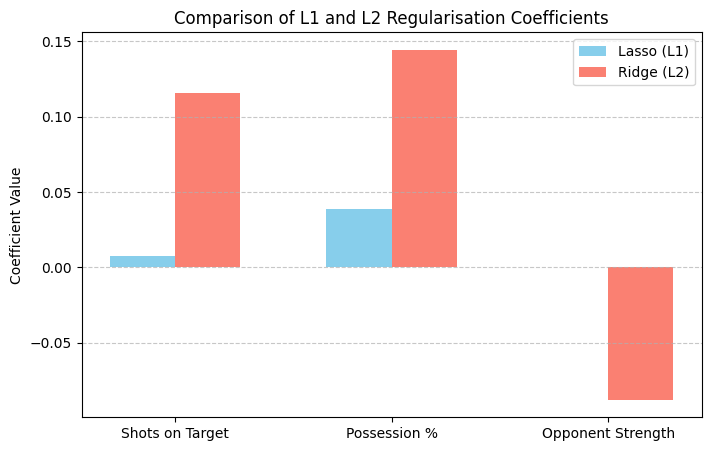

In [20]:
plt.figure(figsize=(8,5))
plt.bar(x_pos - 0.15, lasso_coef, width=0.3, color='skyblue', label='Lasso (L1)')
plt.bar(x_pos + 0.15, ridge_coef, width=0.3, color='salmon', label='Ridge (L2)')
plt.xticks(x_pos, features)
plt.ylabel("Coefficient Value")
plt.title("Comparison of L1 and L2 Regularisation Coefficients")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **D) Detailed Output & Explanation**



**Output:**

- **Lasso (L1) Model**: Coefficients are [0.007, 0.038, 0.000].
- **Ridge (L2) Model**: Coefficients are [0.116, 0.144, -0.088].


**Interpretation:**

- The **Lasso (L1) model** has effectively shrunk the coefficient for the third feature (which could represent "Opponent Strength" in our synthetic football data) to zero. This indicates that L1 regularisation is performing feature selection by eliminating the impact of features deemed less important.
- In contrast, the **Ridge (L2) model** has reduced the magnitude of all coefficients but retained a nonzero value for the third feature. This shows that while Ridge regularisation shrinks coefficients to prevent overfitting, it does not completely remove any feature from the model.


## **🚀 Real-Life Sports Context Recap with Emojis**

- **Football Team Selection ⚽**:  
  - **L1 (Lasso)**: Chooses the best players (features) by dropping the unnecessary ones.  
  - **L2 (Ridge)**: Keeps the whole squad but reduces the impact of less critical players.  
- **NBA Analytics 🏀**:  
  - When predicting outcomes (like win probability), using regularisation helps the model **avoid overfitting** to noisy performance data.
- **Poker Strategy ♠️♥️**:  
  - Similar principles apply when selecting key strategic variables without over-emphasizing outliers.

## **🔥 Final Takeaways**

1. **L1 Regularisation (Lasso)** adds a penalty proportional to the absolute value of weights, leading to **sparse models** that perform feature selection. 🧹  
2. **L2 Regularisation (Ridge)** adds a penalty proportional to the square of weights, **shrinking coefficients** uniformly and keeping all features in the model. 🚀  
3. **The choice** depends on your dataset and goals: use L1 for **feature selection** and L2 for **stability when all features are informative**.  
4. **Our Python code** demonstrates these concepts using synthetic football data, with clear visualizations to help both technical and non-technical audiences understand the differences.